In [2]:
# INICIO PARTE 1

# Importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# IMPORTANTE, este codigo solo se uso para generar el dataframe, ya que cada que se ejecute cambiaran los datos de algunas columnas
# y por lo tanto el resultado de los analisis posteriores variara, para evitar esto guarde el dataframe generado en un csv
# y lo recargue en el siguiente bloque de codigo

# PREGUNTA 1: creacion del dataframe

# Columnas
rotulos = ["Juego", "Plataforma", "Ventas_Mundiales", "Fecha_Lanzamiento", "Genero", "Calificacion"]

# Generar fechas aleatorias entre 2010 y 2023
fechas_aleatorias = pd.to_datetime(
    np.random.choice(pd.date_range("2010-01-01", "2023-12-31"), size=10)
)

# llenar el dataframe con datos aleatorios
df = pd.DataFrame({
    "Juego": [f"Juego{index}" for index in range(1,11)],
    "Plataforma": ["PC", "PS4", "Xbox", "Switch", "PC", "PS4", "Xbox", "Switch", "PC", "PS4"],
    "Ventas_Mundiales": [np.random.randint(1, 10000001) for num in range(1,11)],
    "Fecha_Lanzamiento": fechas_aleatorias,
    "Genero": ["Aventura", "Accion", "RPG", "Deportes", "Aventura", "Accion", "RPG", "Deportes", "Aventura", "Accion"],
    "Calificacion": [round(np.random.uniform(1, 11),1) for num in range(1,11)]
})

In [4]:
# guardamos el dataframe generado para que los datos concuerden
# df.to_csv("Datos_videojuegos.csv", index=False) (comento la linea para evitar sobreescribir el archivo)

# recargamos el dataframe
df = pd.read_csv("Datos_videojuegos.csv")

# verificamos
print(df.head())

    Juego Plataforma  Ventas_Mundiales Fecha_Lanzamiento    Genero  \
0  Juego1         PC           7286349        2022-01-15  Aventura   
1  Juego2        PS4           4647920        2015-05-03    Accion   
2  Juego3       Xbox           5045752        2015-03-11       RPG   
3  Juego4     Switch           9549347        2016-05-31  Deportes   
4  Juego5         PC           5061008        2016-01-06  Aventura   

   Calificacion  
0           5.8  
1           7.9  
2           5.7  
3           5.1  
4           5.7  


In [5]:
# PREGUNTA 1: analisis descriptivo

# calculamos la media
media = df["Ventas_Mundiales"].mean()
print(f"La media de las ventas mundiales es: {media}")

# calculamos la mediana
mediana = df["Ventas_Mundiales"].median()
print(f"La mediana de las ventas mundiales es: {mediana}")

#numero de juegos por genero
genero_juego = df.groupby("Genero").size()
print(f"Numero de juegos clasificados por genero:\n {genero_juego}") 

La media de las ventas mundiales es: 6360780.9
La mediana de las ventas mundiales es: 6570539.5
Numero de juegos clasificados por genero:
 Genero
Accion      3
Aventura    3
Deportes    2
RPG         2
dtype: int64


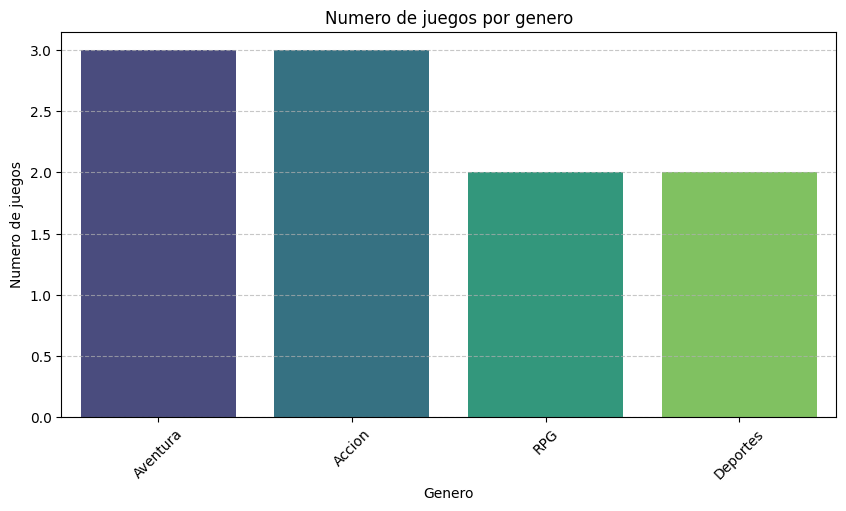

In [6]:
genero_juego = df["Genero"].value_counts().reset_index()
genero_juego.columns = ["Genero", "Numero_Juegos"]

# visualizacion del analisis (grafico de barras)
plt.figure(figsize=(10,5))
sns.barplot(x="Genero", y="Numero_Juegos", data=genero_juego, hue="Genero", palette="viridis")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Numero de juegos por genero")
plt.xlabel("Genero")
plt.ylabel("Numero de juegos")
plt.xticks(rotation=45)
plt.show()

In [7]:
# PREGUNTA 2: limpieza de datos

# 1. Describa como identificarian y manejarian valores faltantes en el conjunto de datos

"""R/ Primero me encargaria de analizar si hay valores faltantes que esten desplazando valores a columnas de corresponde
partiendo de esto, si estan desplazados realizaria la limpieza para estructularlos a sus columnas.
Segundo, analizaria si los valores faltantes nos aportan informacion para realizar por lo menos dos analisis
si no es asi, eliminaria la fila que contenga el valor faltante y si el dato SI aporta informacion
rellernaria el campo con el promedio o la media dependiendo de la distribucion de los datos.
Opcional, revisaria el tipo de dato de la columna para asignar sin informacion o 0 en el campo.

PD: Priorizar el analisis de los datos y establecer objetivos a trabajar antes de realizar cualquier analisis en el dataframe
"""

# 2. Escribir codigo en python para inputar valores faltantes con la media de Ventas_Mundiales y eliminar filas con valores faltantes en Calificacion

# creamos una copia para no modificar el dataframe original (ya que el original esta limpio)
df_copia = df.copy()

# reemplazamos los valores vacio con el promedio de la columna de Ventas_Mundiales
df_copia["Ventas_Mundiales"].fillna(df_copia["Ventas_Mundiales"].mean(), inplace=True)

# eliminamos las filas con valores faltantes en la columna de Calificacion
df_copia.dropna(subset=["Calificacion"], inplace=True)

# FIN PARTE 1

/tmp/ipykernel_42267/4192017017.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia["Ventas_Mundiales"].fillna(df_copia["Ventas_Mundiales"].mean(), inplace=True)


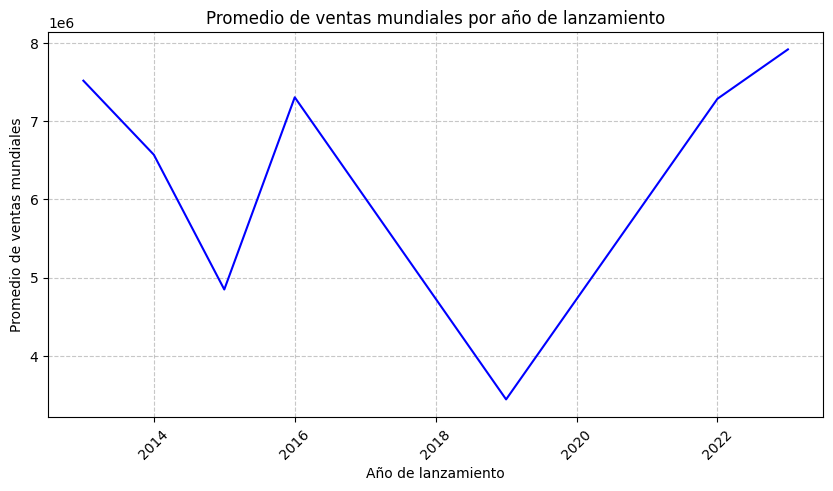

' interpretacion:\nEn el grafico podemos observar que el promedio de ventas mundiales tuvo un decremento durante su lanzamiento hasta el 2015\nluego incremento hasta la mitad del año 2016 y volvio a decaer hasta el año 2019, apartir de este punto comenzaron\na aumentar las ventas mundiales, posiblemente debido a la pandemia y con esta una mayor demanda de videojuegos.\n'

In [8]:
# INICIO PARTE 2

# PREGUNTA 3: analisis de tedencias

# punto 1
def generar_grafico_lineas(data_frame, ventas, fecha):
    """
    Esta funcion genera un grafico de lineas para visualizar el promedio de ventas por año de lanzamiento.
    Recibe un dataframe, la columna de ventas y la columna de fecha.
    """

    # nos aseguramos de que la columna de fecha este en el formato correcto
    data_frame[fecha] = pd.to_datetime(data_frame[fecha])

    # seleccionamos el año de lanzamiento
    data_frame["Año_Lanzamiento"] = data_frame[fecha].dt.year
    
    # agrupamos por año y calculamos la media de ventas
    ventas_por_annio = data_frame.groupby("Año_Lanzamiento")[ventas].mean().reset_index()
    ventas_por_annio.columns = ["Año_Lanzamiento", "Ventas_Mundiales"]
    
    # creamos el grafico de lineas
    plt.figure(figsize=(10,5))
    sns.lineplot(x="Año_Lanzamiento", y="Ventas_Mundiales", data=ventas_por_annio, color="b")
    plt.grid(axis="both", linestyle="--", alpha=0.7)
    plt.title("Promedio de ventas mundiales por año de lanzamiento")
    plt.xlabel("Año de lanzamiento")
    plt.ylabel("Promedio de ventas mundiales")
    plt.xticks(rotation=45)
    plt.show()
         
# punto 2: interpretacion 

generar_grafico_lineas(df, "Ventas_Mundiales", "Fecha_Lanzamiento")

""" interpretacion:
En el grafico podemos observar que el promedio de ventas mundiales tuvo un decremento durante su lanzamiento hasta el 2015
luego incremento hasta la mitad del año 2016 y volvio a decaer hasta el año 2019, apartir de este punto comenzaron
a aumentar las ventas mundiales, posiblemente debido a la pandemia y con esta una mayor demanda de videojuegos.
"""

In [9]:
# PREGUNTA 4

# punto 1: estructurar datos y seleccionar al menos 3 atributos relevantes
""" r/ Crearia un dataframe para estructurar los datos de los jugadores y tomaria los siguientes atributos:
id_jugador, nombre, edad, genero, preferencia, fecha_registro, pais, categoria_juego, tiempo_total_de_juego, region, rango_obtenido
"""

# punto 2: ejemplo en formato JSON
"""
r/ 
{
    "id_jugador": 1,
    "nombre": "Juan Felipe Rendon Herrera",
    "edad": 20,
    "genero": "Masculino",
    "preferencia": ["Accion", "Estrategia"],
    "fecha_registro": "2025-01-01",
    "pais": "Colombia",
    "categoria_juego": ["PC", "PS4"],
    "tiempo_total_de_juego": 100,
    "region": "America",
    "rango_obtenido": ["Campeones Definitivos", "Maestro"]
}
"""

'\nr/ \n{\n    "id_jugador": 1,\n    "nombre": "Juan Felipe Rendon Herrera",\n    "edad": 20,\n    "genero": "Masculino",\n    "preferencia": ["Accion", "Estrategia"],\n    "fecha_registro": "2025-01-01",\n    "pais": "Colombia",\n    "categoria_juego": ["PC", "PS4"],\n    "tiempo_total_de_juego": 100,\n    "region": "America",\n    "rango_obtenido": ["Campeones Definitivos", "Maestro"]\n}\n'

In [10]:
# PUNTO 5

# 5.1: Calcular la matriz de correlacion entre Ventas_Mundiales y Calificacion

# creamos la matriz de correlacion
columnas = ["Ventas_Mundiales", "Calificacion"]
matriz_de_correlacion = df[columnas].corr()
print(f"Matriz de correlacion:\n {matriz_de_correlacion}")

""" Interpretacion
r/ dentro de la matriz de correlacion podemos identificar que es muy cercana a 0 por lo que indica que no existe
   una correlacion significativa entre las ventas mundiales y la calificacion
   esto podria ser causador porque los jugadores no siempre compran los videojuegos basandose en la calificacion de los mismos,
   y por esto las calificaciones no son el mejor indicador para predecir las ventas.
"""

Matriz de correlacion:
                   Ventas_Mundiales  Calificacion
Ventas_Mundiales          1.000000     -0.013433
Calificacion             -0.013433      1.000000


' Interpretacion\nr/ dentro de la matriz de correlacion podemos identificar que es muy cercana a 0 por lo que indica que no existe\n   una correlacion significativa entre las ventas mundiales y la calificacion\n   esto podria ser causador porque los jugadores no siempre compran los videojuegos basandose en la calificacion de los mismos,\n   y por esto las calificaciones no son el mejor indicador para predecir las ventas.\n'

Ventas promedio por plataforma:
   Plataforma Ventas_Mundiales
0         PC     5,262,844.67
1        PS4     6,332,580.00
2     Switch     7,929,070.00
3       Xbox     6,481,697.50


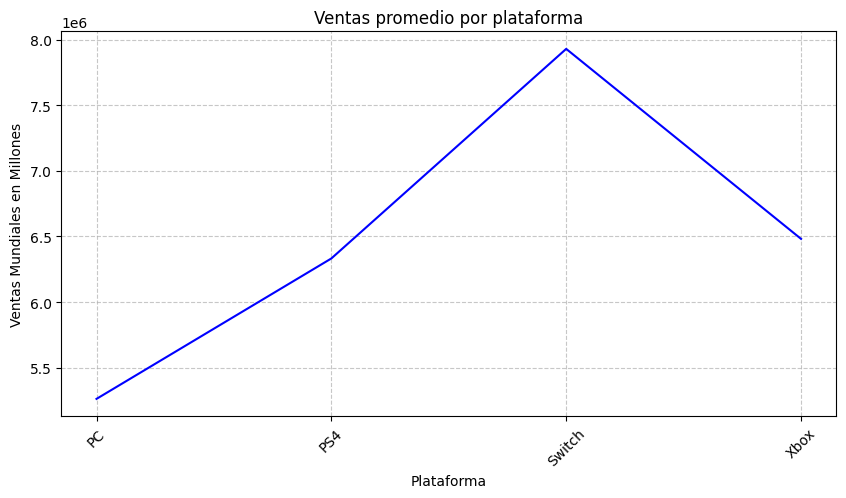

In [11]:
# 5.2: Segmentar por plataforma y calcular las ventas promedio, ademas de usar un grafico de lineas para la visualizacion

# segmentamos los datos por plataforma y calculamos el promedio de las ventas y reseteamos los indices
ventas_promedio_por_plataforma = (
    df.groupby("Plataforma")["Ventas_Mundiales"].mean().reset_index()
)
print(f"Ventas promedio por plataforma:\n {ventas_promedio_por_plataforma.to_string(formatters={"Ventas_Mundiales": "{:,.2f}".format})}") #uso de ia para formatear valores en lugar de usar la notacion cientifica

# creamos el grafico de lineas
plt.figure(figsize=(10,5))
sns.lineplot(x="Plataforma", y="Ventas_Mundiales", data=ventas_promedio_por_plataforma, color="b")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.title("Ventas promedio por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Mundiales en Millones")
plt.xticks(rotation=45)
plt.show()

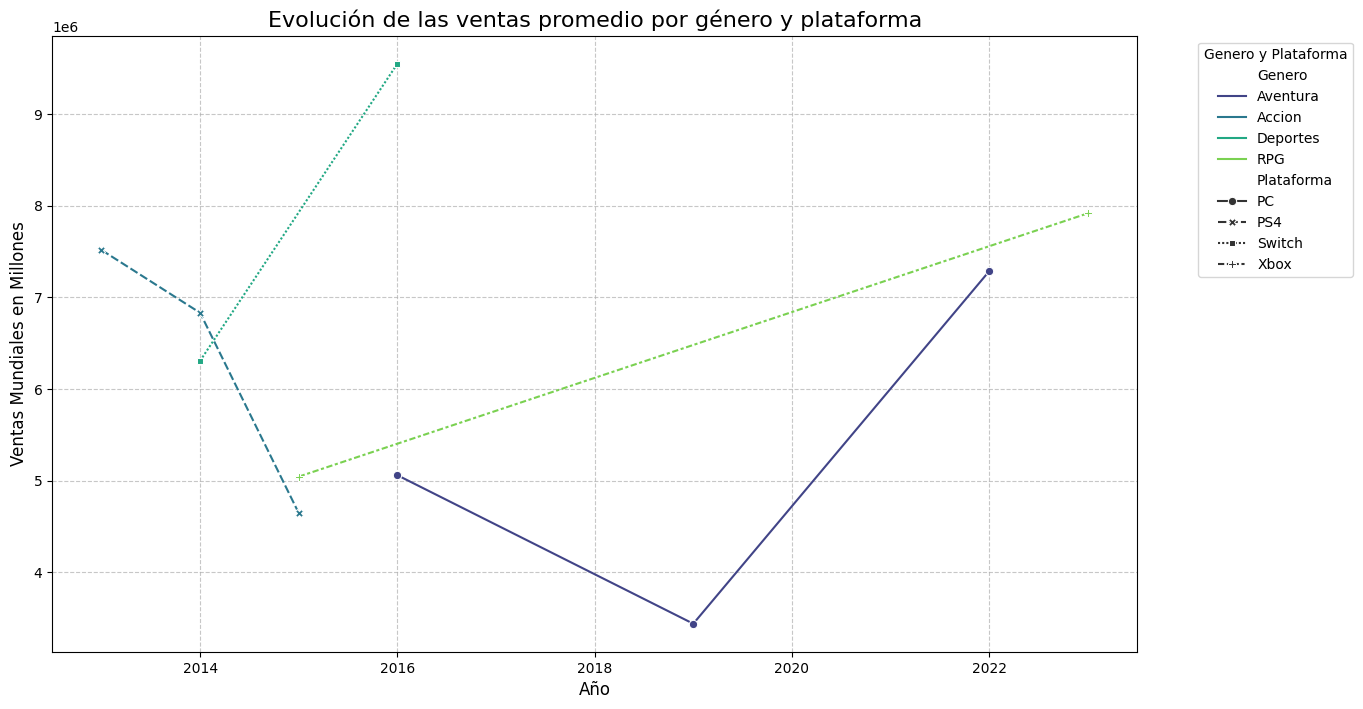

In [12]:
# RESUMEN EJECUTIVO (MAXIMO 5 LINEAS)

"""
Switch lidera en terminos medios de ventas mundiales, esto podria ser causado gracias a su exclusividad dentro 
de ciertos videojuegos. Los RPGs son la categoría con mayor rentabilidad en Switch, dado que exhiben un crecimiento
continuo desde el año 2020. Las ventas globales han tenido un comportamiento estable durante los ultimos años, mas sin embargo, no se
encontro una correlacion significativa entre la calificacion de de los juegos y las ventas mundiales (-0.01). Recomendamos
enfocar las estrategias de marketing en RPGs para Switch y explorar oportunidades en otros generos que van surgiendo.
"""

# corregimos el formato de la fecha para evitar errores
df["Fecha_Lanzamiento"] = pd.to_datetime(df["Fecha_Lanzamiento"])

# seleccionamos el año de lanzamiento
df["Año"] = df["Fecha_Lanzamiento"].dt.year

# agrupamos por plataforma, genero y año y calculamos el promedio de ventas
ventas_por_genero_tiempo = (
    df.groupby(["Plataforma", "Genero", "Año"])["Ventas_Mundiales"].mean().reset_index()
)

# realizamos el grafico
plt.figure(figsize=(14, 8))
sns.lineplot(
    x="Año",
    y="Ventas_Mundiales",
    hue="Genero",
    style="Plataforma",
    data=ventas_por_genero_tiempo,
    palette="viridis",
    markers=True,
)
plt.title("Evolución de las ventas promedio por género y plataforma", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ventas Mundiales en Millones", fontsize=12)
plt.legend(title="Genero y Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

In [13]:
# SECCION DE METRICAS ADICIONALES

# calculamos la metricas adicionales a analizar

# agrupamos por genero y calculamos el promedio y la suma de las ventas mundiales
ventas_por_genero = (
    df.groupby("Genero")["Ventas_Mundiales"]
    .agg(["mean", "sum"])
    .reset_index()
)

# renombramos las columnas
ventas_por_genero.columns = [
    "Genero",
    "Ventas_Promedio",
    "Ventas_Totales",
]  

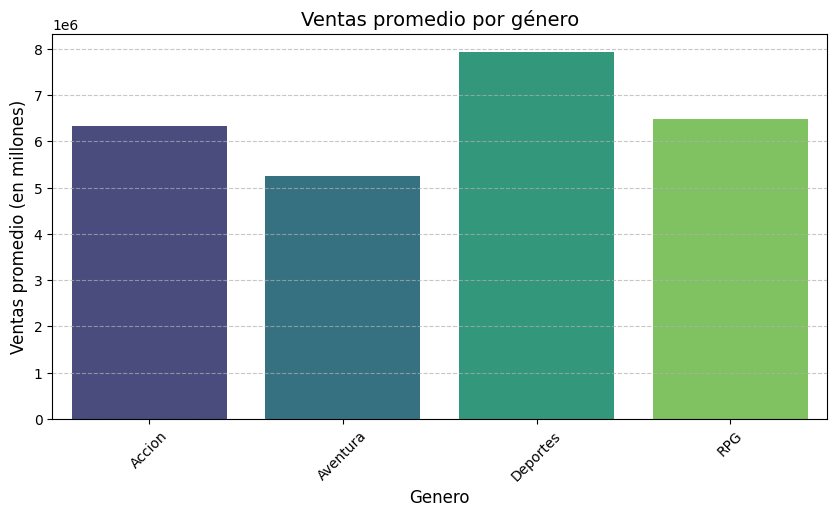

'\nr/ Como podemos ver dentro del grafico, deportes es el genero que tiene \n'

In [14]:
# grafico: ventas promedio por genero
plt.figure(figsize=(10, 5))
sns.barplot(x="Genero", y="Ventas_Promedio", data=ventas_por_genero, hue="Genero", palette="viridis")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Ventas promedio por género", fontsize=14)
plt.xlabel("Genero", fontsize=12)
plt.ylabel("Ventas promedio (en millones)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Interpretacion
"""
r/ Como podemos ver dentro del grafico, deportes es el genero que tiene 
"""

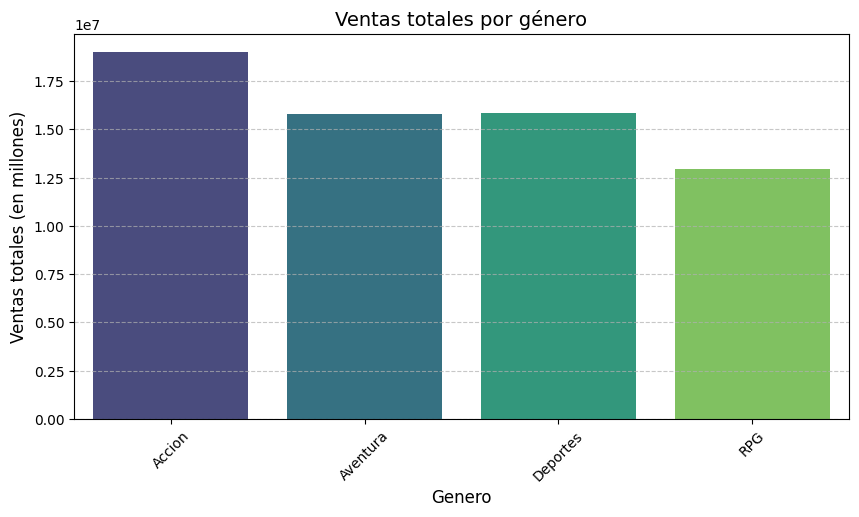

'\nr/\n'

In [15]:
# grafico: ventas totales por genero
plt.figure(figsize=(10, 5))
sns.barplot(x="Genero", y="Ventas_Totales", data=ventas_por_genero, hue="Genero", palette="viridis")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Ventas totales por género", fontsize=14)
plt.xlabel("Genero", fontsize=12)
plt.ylabel("Ventas totales (en millones)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Interpretacion
"""
r/
"""